In [22]:
from pydub import AudioSegment
from pydub.playback import play
from pydub.silence import split_on_silence
import logging
from pathlib import Path

In [18]:
def delete_silence(segment: AudioSegment, min_silence_len: float, silence_thresh=-70.0) -> AudioSegment:
    chunks = split_on_silence(
    segment,
    min_silence_len=min_silence_len,
    silence_thresh=silence_thresh 
    )

    # Concatenate the chunks back together
    processed_audio = AudioSegment.empty()
    for chunk in chunks:
        processed_audio += chunk

    print(f"Type of processed_audio: {type(processed_audio)}")
    return processed_audio

In [27]:
from sound_merge.config import music_dir_clean, benchmark_path

dest = Path(benchmark_path / "test/music2")
for file in music_dir_clean.glob("*.wav"):
    segment = AudioSegment.from_file(file, format="wav")
    processed_audio = delete_silence(segment, min_silence_len=1000)
    processed_audio.export(file, format="wav")
    print(f"{file} processed")

CouldntDecodeError: Decoding failed. ffmpeg returned error code: 183

Output from ffmpeg/avlib:

ffmpeg version 6.1.1-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay
  libavutil      58. 29.100 / 58. 29.100
  libavcodec     60. 31.102 / 60. 31.102
  libavformat    60. 16.100 / 60. 16.100
  libavdevice    60.  3.100 / 60.  3.100
  libavfilter     9. 12.100 /  9. 12.100
  libswscale      7.  5.100 /  7.  5.100
  libswresample   4. 12.100 /  4. 12.100
  libpostproc    57.  3.100 / 57.  3.100
[wav @ 0x7f8501f053c0] invalid start code [0][0][0][0] in RIFF header
[in#0 @ 0x7f8501f05240] Error opening input: Invalid data found when processing input
Error opening input file /Users/glebmokeev/audio-projects/data/music-clean/musdb-sample97.wav.
Error opening input files: Invalid data found when processing input


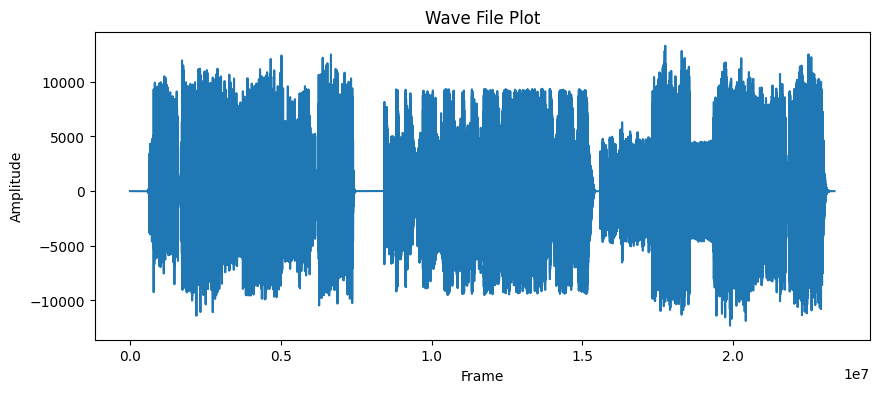

In [33]:
from sound_merge.augm import *
segment = AudioSegment.from_file("/Users/glebmokeev/audio-projects/data/music-clean/musdb-sample4.wav", format="wav")
display_waveform(segment)

In [42]:
from pydub import AudioSegment
from sound_merge.config import *
duration = 30 * 1000

for file in music_dir_clean.iterdir():

    segment = AudioSegment.from_file(file)

    pieces = [segment[i:i+duration] for i in range(0, len(segment), duration)]

    for index, piece in enumerate(pieces):
        piece.export(placeholder / file.name, format="wav")

CouldntDecodeError: Decoding failed. ffmpeg returned error code: 183

Output from ffmpeg/avlib:

ffmpeg version 6.1.1-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay
  libavutil      58. 29.100 / 58. 29.100
  libavcodec     60. 31.102 / 60. 31.102
  libavformat    60. 16.100 / 60. 16.100
  libavdevice    60.  3.100 / 60.  3.100
  libavfilter     9. 12.100 /  9. 12.100
  libswscale      7.  5.100 /  7.  5.100
  libswresample   4. 12.100 /  4. 12.100
  libpostproc    57.  3.100 / 57.  3.100
[in#0 @ 0x7f986cf04300] Error opening input: Invalid data found when processing input
Error opening input file /Users/glebmokeev/audio-projects/data/music-clean/musdb-sample97.wav.
Error opening input files: Invalid data found when processing input
